In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import zscore

In [3]:
import os
os.getcwd()

'C:\\Users\\hp'

In [40]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
data = {'A':[1,4,np.nan,np.nan], 'B':[2,5,7,np.nan], 'C':[3,np.nan,np.nan,np.nan]}
df = pd.DataFrame(data)
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


--> If data is skewed then its better to drop it or use median to fill the skewed values
--> If % of Null values is around 50% more then its better to replace 
--> If almost every values are Null then its better to drop the whole column


In [11]:
df.isnull().sum()

A    2
B    1
C    3
dtype: int64

In [12]:
df.dropna()

,A,B,C
0,1.0,2.0,3.0


In [13]:
df.dropna(how='all')

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [14]:
df.dropna(how='all',axis=1) #it will check column wise

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [16]:
df.dropna(thresh=1,axis=0) #thresh checks for non null values

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [17]:
df.dropna(thresh=2) 

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN


In [18]:
df.dropna(thresh=3)

,A,B,C
0,1.0,2.0,3.0


In [19]:
df.fillna(0)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,0.0
2,0.0,7.0,0.0
3,0.0,0.0,0.0


In [28]:
df['A']=df['A'].fillna(0)
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [33]:
forward_fill=df.fillna(method='ffill')
forward_fill

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,3.0
2,0.0,7.0,3.0
3,0.0,7.0,3.0


In [34]:
df['B']=df['B'].fillna(df['B'].mean())
df

,A,B,C
0,1.0,2.000000,3.0
1,4.0,5.000000,NaN
2,0.0,7.000000,NaN
3,0.0,4.666667,NaN


## Bi-variate and Multivariate Analysis 

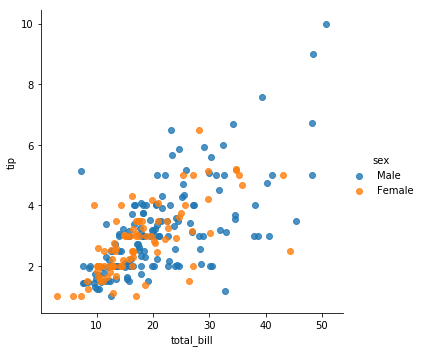

In [42]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,hue='sex')
plt.show()

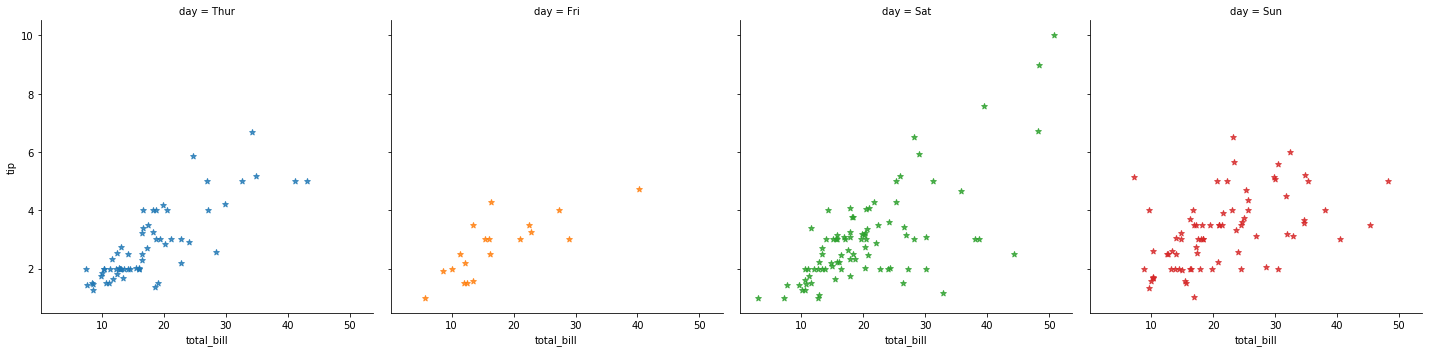

In [54]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,hue='day',col='day',markers='*')
plt.show()

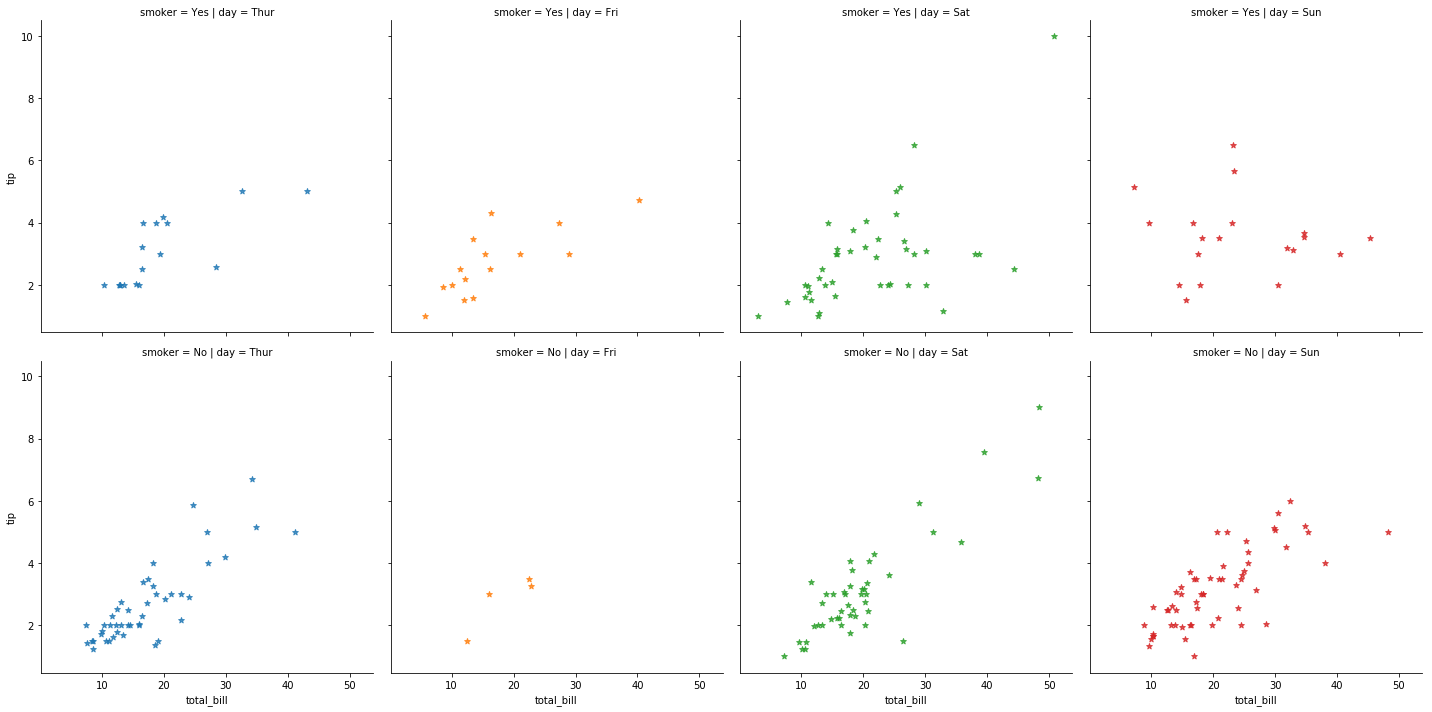

In [55]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,hue='day',col='day',row='smoker',markers='*')

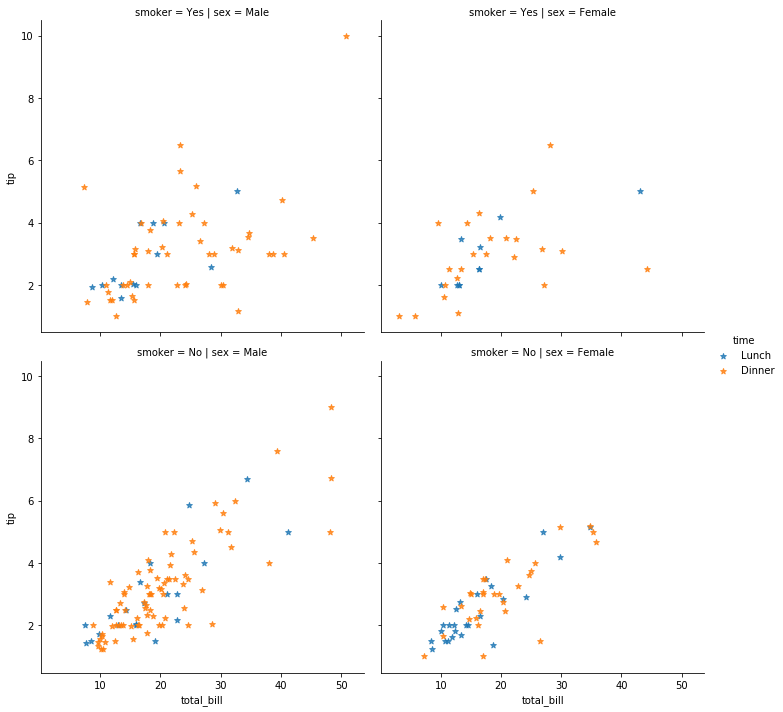

In [56]:
sns.lmplot(x='total_bill',y='tip',data=df1,fit_reg=False,hue='time',col='sex',row='smoker',markers='*')

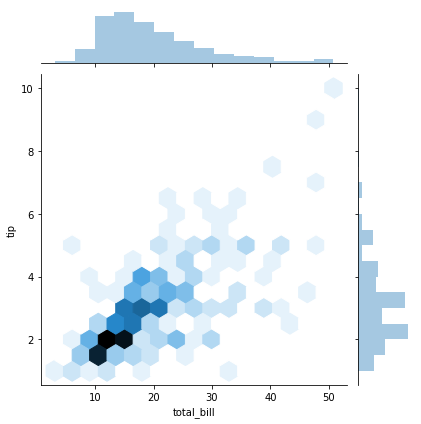

In [64]:
sns.jointplot(x='total_bill',y='tip',data=df1,kind='hex')
plt.show()

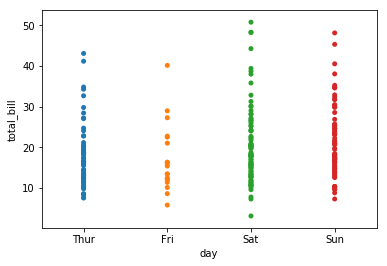

In [65]:
sns.stripplot(x='day',y='total_bill',data=df1,jitter=False)

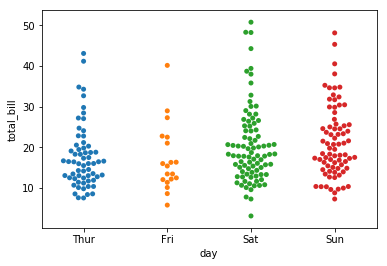

In [70]:
sns.swarmplot(x='day',y='total_bill',data=df1)
plt.show()

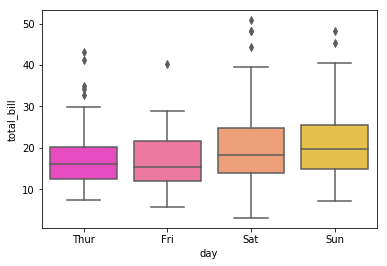

In [78]:
sns.boxplot(x='day',y='total_bill',data=df1,palette='spring')
plt.show()

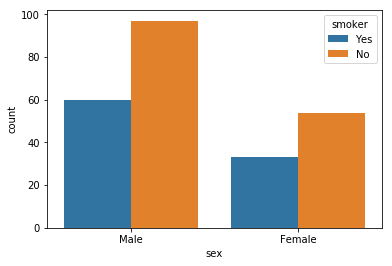

In [81]:
sns.countplot(x='sex',data=df1,hue='smoker')

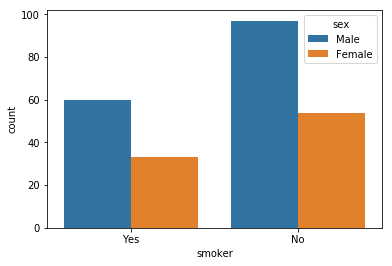

In [82]:
sns.countplot(x='smoker',data=df1,hue='sex')

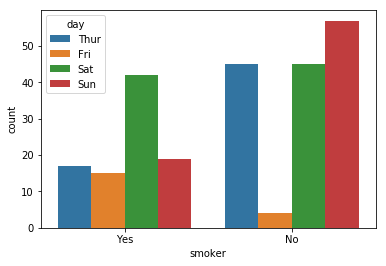

In [87]:
sns.countplot(x='smoker',data=df1,hue='day')

In [101]:
df1.groupby(['smoker','sex']).agg({'sex':'count'},{'smoker':'count'})

sex
smoker sex        
Yes    Male     60
       Female   33
No     Male     97
       Female   54

In [107]:
df1.groupby(['day','sex']).agg({'tip':'max'})

tip
day  sex          
Thur Male     6.70
     Female   5.17
Fri  Male     4.73
     Female   4.30
Sat  Male    10.00
     Female   6.50
Sun  Male     6.50
     Female   5.20

In [108]:
df1.pivot_table(index='sex',columns='smoker',values='size',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [109]:
pd.crosstab(df1['sex'],df1['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [114]:
cor=df1[['total_bill','tip']].corr()
cor

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


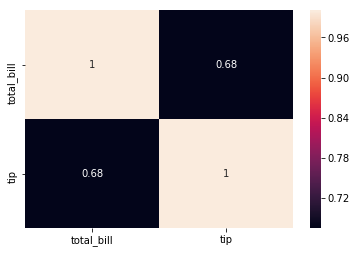

In [115]:
sns.heatmap(cor,annot=True)
plt.show()

In [116]:
SB=pd.crosstab(df1['sex'],df1['day'])
SB

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


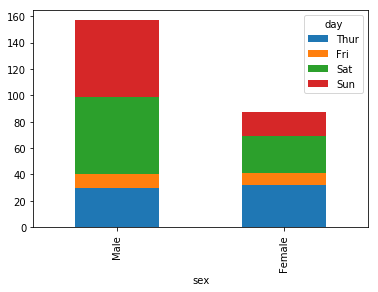

In [118]:
SB.plot(kind='bar',stacked=True)

In [139]:
master=pd.read_csv('master-1.csv')
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [127]:
master.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [130]:
master.shape

(27820, 12)

In [131]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [134]:
master.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [137]:
master.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [183]:
def func(master):
    null=master.isnull().sum()
    
    null_cent = (master.isnull().sum() * 100) /len(master)
    missing = pd.DataFrame({'%null': null_cent,'total_null':null})

    return(missing)
func(master)


,%null,total_null
country,0.000000,0
year,0.000000,0
sex,0.000000,0
age,0.000000,0
suicides_no,0.000000,0
population,0.000000,0
suicides/100k pop,0.000000,0
country-year,0.000000,0
HDI for year,69.935298,19456
gdp_for_year ($),0.000000,0


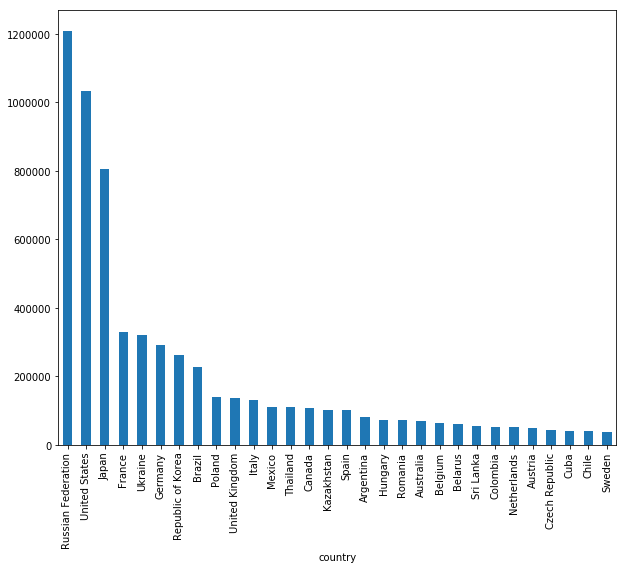

In [214]:
master.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(10,8))
plt.show()



In [218]:
a=df1['sex'][df1['smoker']=='Yes'].value_counts()
b=df1['sex'][df1['smoker']=='No'].value_counts()

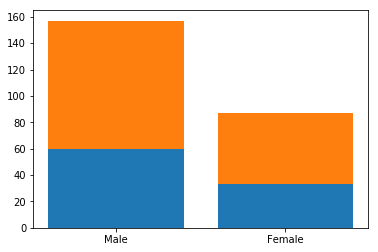

In [219]:
plt.bar(a.index,a.values)
plt.bar(b.index,b.values,bottom=a.values)
plt.show()

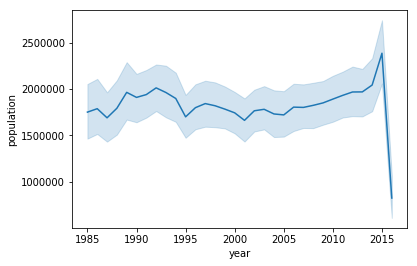

In [221]:
sns.lineplot(x='year',y='population',data=master)

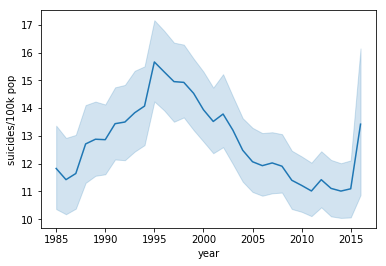

In [222]:
sns.lineplot(x='year',y='suicides/100k pop',data=master)

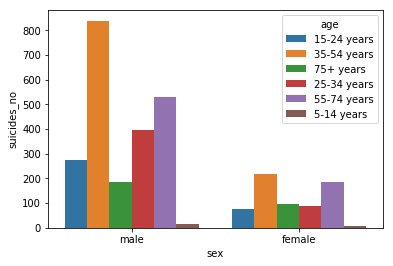

In [225]:
sns.barplot(x='sex',y='suicides_no',data=master,hue='age',ci=0)

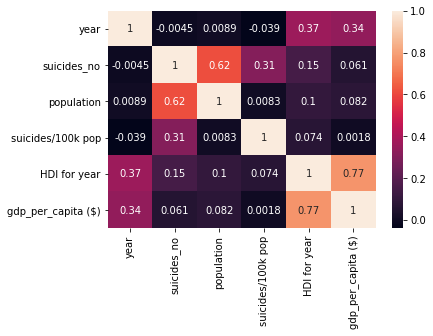

In [230]:
sns.heatmap(master.corr(),annot=True)